In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import squarify
import datetime as dt

In [2]:
%matplotlib inline

In [7]:
#Load the data
data=pd.read_csv("sales_data.csv",encoding="unicode_escape", parse_dates=['order_date'])

In [8]:
# setting the max rows and cols to display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [9]:
#Glimpse of data
print(data.info())
print(data.head())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_date   5009 non-null   datetime64[ns]
 1   order_id     5009 non-null   object        
 2   customer     5009 non-null   object        
 3   grand_total  5009 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 156.7+ KB
None
  order_date        order_id          customer  grand_total
0 2011-09-07  CA-2011-100006       Dennis Kane          378
1 2011-07-08  CA-2011-100090        Ed Braxton          699
2 2011-03-14  CA-2011-100293  Neil Franz?sisch           91
3 2011-01-29  CA-2011-100328   Jasper Cacioppo            4
4 2011-04-08  CA-2011-100363       Jim Mitchum           21
        grand_total
count   5009.000000
mean     458.626672
std      954.729307
min        1.000000
25%       38.000000
50%      152.000000
75%      512.000000
max 

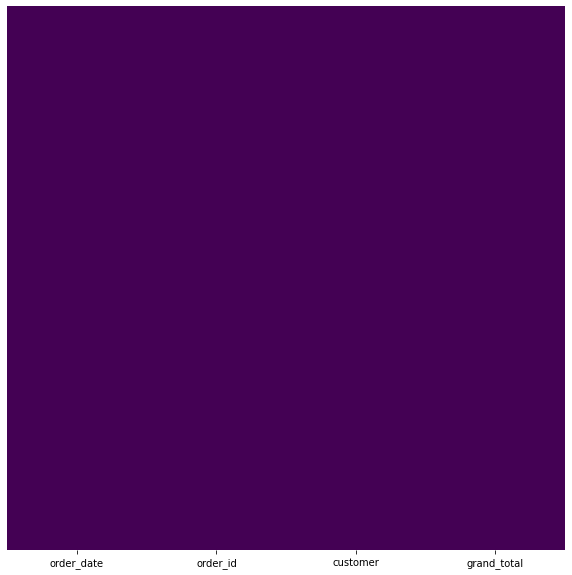

In [10]:
#check the null valus using heatmap
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [11]:
data.shape

(5009, 4)

In [12]:
#include = df[df['Date'].dt.year == year]
data=data.loc[data['order_date'].dt.year==2012]
data.head()

,order_date,order_id,customer,grand_total
806,2012-05-14,CA-2012-100146,Claudia Bergmann,1453
807,2012-04-13,CA-2012-100216,Heather Jas,86
808,2012-05-17,CA-2012-100251,Dianna Vittorini,87
809,2012-11-20,CA-2012-100454,Brian Moss,258
810,2012-11-22,CA-2012-100545,Irene Maddox,12


In [13]:
def get_month(x):
    return dt.datetime(x.year, x.month,1)

In [14]:
data["InvoiceMonth"]=data["order_date"].apply(get_month)

In [15]:
data["InvoiceMonth"].head()

806   2012-05-01
807   2012-04-01
808   2012-05-01
809   2012-11-01
810   2012-11-01
Name: InvoiceMonth, dtype: datetime64[ns]

In [16]:
data["CohortMonth"]=data.groupby("customer")["InvoiceMonth"].transform('min')

In [17]:
data["CohortMonth"].head()

806   2012-01-01
807   2012-04-01
808   2012-05-01
809   2012-10-01
810   2012-07-01
Name: CohortMonth, dtype: datetime64[ns]

In [18]:
data.head()

,order_date,order_id,customer,grand_total,InvoiceMonth,CohortMonth
806,2012-05-14,CA-2012-100146,Claudia Bergmann,1453,2012-05-01,2012-01-01
807,2012-04-13,CA-2012-100216,Heather Jas,86,2012-04-01,2012-04-01
808,2012-05-17,CA-2012-100251,Dianna Vittorini,87,2012-05-01,2012-05-01
809,2012-11-20,CA-2012-100454,Brian Moss,258,2012-11-01,2012-10-01
810,2012-11-22,CA-2012-100545,Irene Maddox,12,2012-11-01,2012-07-01


In [20]:
def get_date(data,column):
    year=data[column].dt.year
    month=data[column].dt.month
    day=data[column].dt.day
    return year, month, day
    

In [21]:
invoice_year, invoice_month,_=get_date(data,"InvoiceMonth")

In [22]:
cohort_year, cohort_month,_=get_date(data,"CohortMonth")

In [23]:
year_diff=invoice_year-cohort_year

In [24]:
month_diff=invoice_month-cohort_month

In [25]:
year_diff

806     0
807     0
808     0
809     0
810     0
811     0
812     0
813     0
814     0
815     0
816     0
817     0
818     0
819     0
820     0
821     0
822     0
823     0
824     0
825     0
826     0
827     0
828     0
829     0
830     0
831     0
832     0
833     0
834     0
835     0
836     0
837     0
838     0
839     0
840     0
841     0
842     0
843     0
844     0
845     0
846     0
847     0
848     0
849     0
850     0
851     0
852     0
853     0
854     0
855     0
856     0
857     0
858     0
859     0
860     0
861     0
862     0
863     0
864     0
865     0
866     0
867     0
868     0
869     0
870     0
871     0
872     0
873     0
874     0
875     0
876     0
877     0
878     0
879     0
880     0
881     0
882     0
883     0
884     0
885     0
886     0
887     0
888     0
889     0
890     0
891     0
892     0
893     0
894     0
895     0
896     0
897     0
898     0
899     0
900     0
901     0
902     0
903     0
904     0
905     0


In [26]:
month_diff

806      4
807      0
808      0
809      1
810      4
811      0
812      0
813      9
814      0
815      0
816      0
817      0
818      0
819      0
820      1
821      0
822      0
823      0
824      0
825      7
826      0
827      6
828      4
829      0
830      0
831      4
832      0
833      0
834      4
835      0
836      8
837      0
838      0
839      0
840      0
841      0
842      0
843      0
844      0
845      2
846      1
847      3
848      0
849      0
850      1
851     10
852      0
853      0
854      0
855      0
856      0
857      0
858      0
859      0
860      0
861      0
862      5
863      0
864      7
865      0
866      6
867      0
868      4
869      5
870      0
871      7
872      0
873      0
874      7
875      0
876      0
877      0
878      6
879      0
880      0
881      0
882      7
883      0
884      6
885      0
886      0
887      9
888      0
889      0
890      4
891      6
892      0
893      5
894      4
895      5
896      0

In [27]:
data["CohortIndex"]=year_diff*12+month_diff+1

In [28]:
data["CohortIndex"]

806      5
807      1
808      1
809      2
810      5
811      1
812      1
813     10
814      1
815      1
816      1
817      1
818      1
819      1
820      2
821      1
822      1
823      1
824      1
825      8
826      1
827      7
828      5
829      1
830      1
831      5
832      1
833      1
834      5
835      1
836      9
837      1
838      1
839      1
840      1
841      1
842      1
843      1
844      1
845      3
846      2
847      4
848      1
849      1
850      2
851     11
852      1
853      1
854      1
855      1
856      1
857      1
858      1
859      1
860      1
861      1
862      6
863      1
864      8
865      1
866      7
867      1
868      5
869      6
870      1
871      8
872      1
873      1
874      8
875      1
876      1
877      1
878      7
879      1
880      1
881      1
882      8
883      1
884      7
885      1
886      1
887     10
888      1
889      1
890      5
891      7
892      1
893      6
894      5
895      6
896      1

In [29]:
cohort_data=data.groupby(["CohortMonth","CohortIndex"])["customer"].apply(pd.Series.nunique).reset_index()

In [30]:
cohort_count=cohort_data.pivot_table(index="CohortMonth", columns='CohortIndex', values="customer")

In [31]:
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2012-01-01,28.0,2.0,2.0,NaN,4.0,2.0,4.0,1.0,5.0,3.0,3.0,2.0
2012-02-01,36.0,3.0,4.0,1.0,5.0,2.0,3.0,7.0,7.0,9.0,7.0,NaN
2012-03-01,71.0,6.0,8.0,8.0,6.0,7.0,11.0,11.0,16.0,8.0,NaN,NaN
2012-04-01,59.0,4.0,4.0,5.0,4.0,7.0,6.0,12.0,3.0,NaN,NaN,NaN
2012-05-01,52.0,2.0,2.0,5.0,12.0,6.0,9.0,10.0,NaN,NaN,NaN,NaN
2012-06-01,47.0,5.0,3.0,10.0,2.0,13.0,10.0,NaN,NaN,NaN,NaN,NaN
2012-07-01,40.0,3.0,4.0,4.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-01,38.0,6.0,3.0,5.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-01,64.0,5.0,8.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#pd.concat((df,s), axis=1)
cohort_size = cohort_count.iloc[:,0] #select all the rows : select the first column
retention = pd.concat((cohort_size/100,cohort_count.divide(cohort_size, axis=0)),axis=1) #Divide the cohort by the first column
retention.round(3) # round the retention to 3 places

,1,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2012-01-01,0.28,1.0,0.071,0.071,NaN,0.143,0.071,0.143,0.036,0.179,0.107,0.107,0.071
2012-02-01,0.36,1.0,0.083,0.111,0.028,0.139,0.056,0.083,0.194,0.194,0.250,0.194,NaN
2012-03-01,0.71,1.0,0.085,0.113,0.113,0.085,0.099,0.155,0.155,0.225,0.113,NaN,NaN
2012-04-01,0.59,1.0,0.068,0.068,0.085,0.068,0.119,0.102,0.203,0.051,NaN,NaN,NaN
2012-05-01,0.52,1.0,0.038,0.038,0.096,0.231,0.115,0.173,0.192,NaN,NaN,NaN,NaN
2012-06-01,0.47,1.0,0.106,0.064,0.213,0.043,0.277,0.213,NaN,NaN,NaN,NaN,NaN
2012-07-01,0.40,1.0,0.075,0.100,0.100,0.125,0.225,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-01,0.38,1.0,0.158,0.079,0.132,0.342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-01,0.64,1.0,0.078,0.125,0.156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


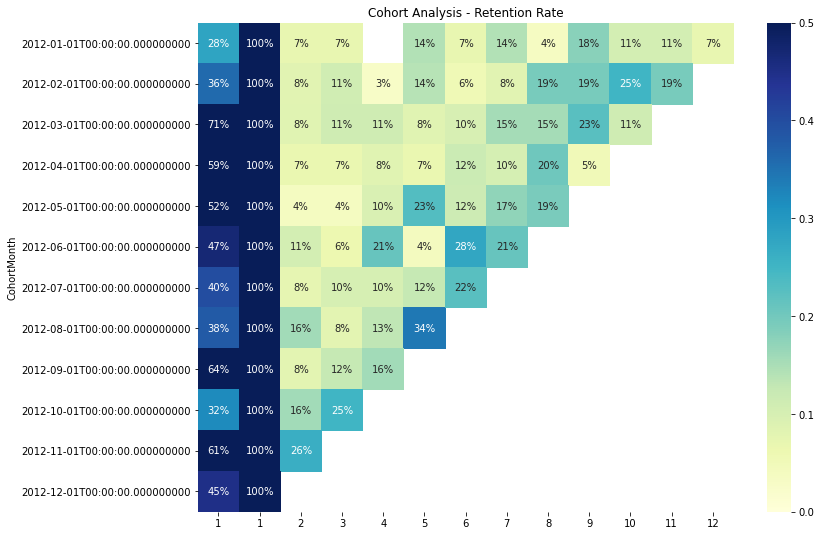

In [33]:
plt.figure(figsize = (12,9))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")
plt.show()